# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 10.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (COMP)
# VIENNA 11035

In [3]:
loc = 'Vienna 11035'

---

## Loading Data:

All data has been downloaded via the cds-api in a similar manner like depicted in 'IGRA_Comparison_Request.ipyn'. 

In [4]:
files = glob.glob('IGRA_11035/*/*.csv')
files_h = glob.glob('IGRA_H_11035/*/*.csv')
print(len(files) == len(files_h))

True


In [5]:
# IGRA and its harmonized version
for i in range(len(files)):
    if i == 0:
        igra = pandas.read_csv(files[i], header=12)
        igrah = pandas.read_csv(files_h[i], header=12)
    else:
        igra = igra.append(pandas.read_csv(files[i], header=12))
        igrah = igrah.append(pandas.read_csv(files_h[i], header=12))

In [6]:
# COMP - Comprehensive upper-air observation network from 1905 to present
files = glob.glob('COMP_11035/*/temperature.csv')
for i in range(len(files)):
    if i == 0:
        comp = pandas.read_csv(files[i])
    else:
        comp = comp.append(pandas.read_csv(files[i]))

In [7]:
comp = comp[comp.time < '2018-10'] # igra data is only available up to Oct.2018, so we shorten the comp data

## Getting the data to the same length for comparison (IGRA_H vs COMP) on 4 standard pressure leveles:
there are more ascents in the COMP data, it will be reduced to only ascents starting at 00:00 and 12:00. <br>
Sometimes the ascents were not exactly at 00:00 or 12:00, but were assigned to those profiles.<br>
In the remaining data there are some points in time, which are not in both datasets - those will be removed too.


In [8]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
missing_i = []
missing_c = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    datai = igra[igra.air_pressure == i]
    datai.report_timestamp = pandas.to_datetime(datai.report_timestamp, utc=True)
    datah = igrah[igrah.air_pressure == i]
    datah.report_timestamp = pandas.to_datetime(datah.report_timestamp, utc=True)
    datac = comp[comp.plev == i]
    datar = (datac[datac.time.str[-8:] == '12:00:00'].append(datac[datac.time.str[-8:] == '00:00:00'])).sort_values('time')
    datar.time = pandas.to_datetime(datar.time, utc=True)
    datac.time = pandas.to_datetime(datac.time, utc=True)

    print('Length of COMP: ' + str(len(datac.time)))
    print('Missing Values of COMP: ' + str(datac.ta.isnull().sum()))
    print('Length of reduced COMP: ' + str(len(datar.time)))
    print('Missing Values of reduced COMP: ' + str(datar.ta.isnull().sum()))
    print('Length of IGRA: ' + str(len(datai.report_timestamp)))
    print('Missing Values of IGRA: ' + str(datai.air_temperature.isnull().sum()))
    print('Length of IGRA_H: ' + str(len(datah.report_timestamp)))
    print('Missing Values of IGRA_H: ' + str(datah.air_temperature.isnull().sum()))
    print('Length difference of reduced COMP to IGRA: ' + str(len(datar.time)-len(datai.report_timestamp)))
    print('Length difference of reduced COMP to IGRA_H: ' + str(len(datar.time)-len(datah.report_timestamp)))
    missingtimes1 = []
    for i in datar.time:
        if len(datah[datah.report_timestamp == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes1.append(i)
            datar = datar[datar.time != i] # -> kicking it out, if not
    print('Missing Timestamps in IGRA_H relative to reduced COMP: ' + str(len(missingtimes1)))
    missingtimes2 = []
    for i in datah.report_timestamp:
        if len(datar[datar.time == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes2.append(i)
            datah = datah[datah.report_timestamp != i] # -> kicking it out, if not
            datai = datai[datai.report_timestamp != i] # -> kicking it out, if not
    print('Missing Timestamps in reduced COMP relative to IGRA_H: ' + str(len(missingtimes2)))
    comp_adjusted.append(datar)
    igra_h_adjusted.append(datah)
    igra_adjusted.append(datai)
    missing_i.append(len(missingtimes2))
    missing_c.append(len(missingtimes1))

--- 
pressure level: 10000


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Length of COMP: 46988
Missing Values of COMP: 0
Length of reduced COMP: 29425
Missing Values of reduced COMP: 0
Length of IGRA: 29171
Missing Values of IGRA: 0
Length of IGRA_H: 29171
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: 254
Length difference of reduced COMP to IGRA_H: 254
Missing Timestamps in IGRA_H relative to reduced COMP: 352
Missing Timestamps in reduced COMP relative to IGRA_H: 98
--- 
pressure level: 20000
Length of COMP: 47025
Missing Values of COMP: 0
Length of reduced COMP: 29415
Missing Values of reduced COMP: 0
Length of IGRA: 29170
Missing Values of IGRA: 0
Length of IGRA_H: 29170
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: 245
Length difference of reduced COMP to IGRA_H: 245


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 385
Missing Timestamps in reduced COMP relative to IGRA_H: 140
--- 
pressure level: 50000
Length of COMP: 47123
Missing Values of COMP: 0
Length of reduced COMP: 29463
Missing Values of reduced COMP: 0
Length of IGRA: 29237
Missing Values of IGRA: 0
Length of IGRA_H: 29237
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: 226
Length difference of reduced COMP to IGRA_H: 226


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 347
Missing Timestamps in reduced COMP relative to IGRA_H: 121
--- 
pressure level: 85000
Length of COMP: 47100
Missing Values of COMP: 0
Length of reduced COMP: 29453
Missing Values of reduced COMP: 0
Length of IGRA: 29203
Missing Values of IGRA: 0
Length of IGRA_H: 29203
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: 250
Length difference of reduced COMP to IGRA_H: 250


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 372
Missing Timestamps in reduced COMP relative to IGRA_H: 122


## Missing data in the data sets

Now we display the missing data in the datasets, those bars labeled as COMP depict the data which is missing in the COMP data set but is available in the IGRA data set; and vice versa.

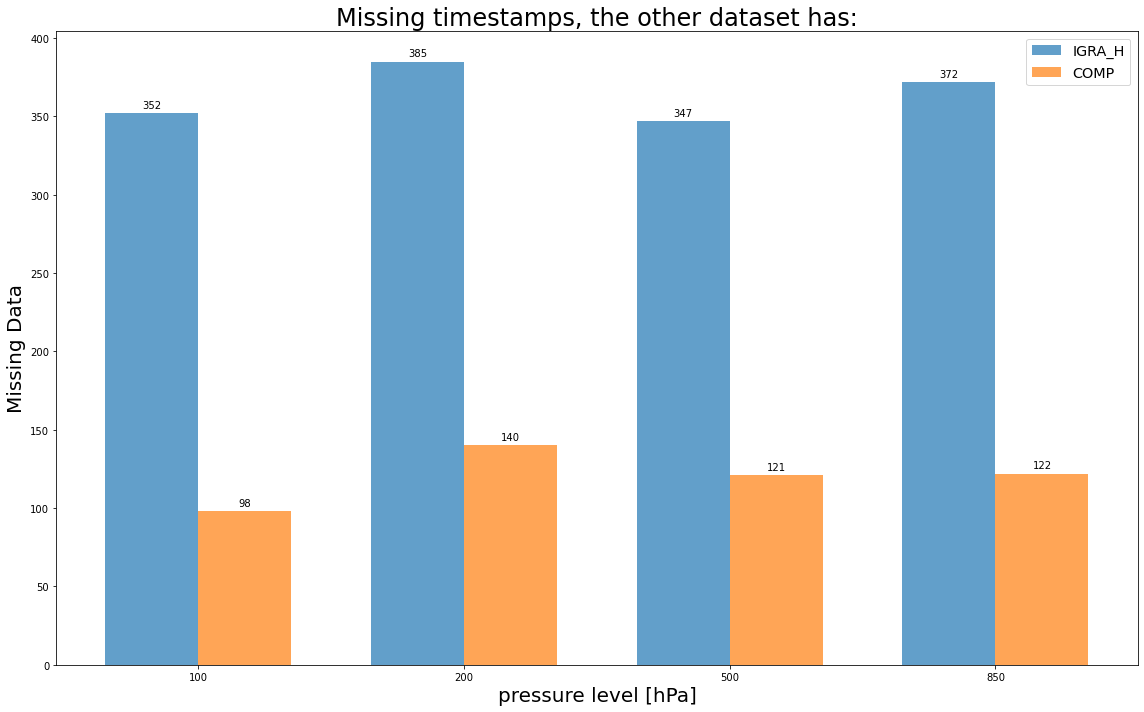

In [9]:
pressl = [100, 200, 500, 850]
x = np.arange(len(pressl))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, missing_c, width, label='IGRA_H', alpha=0.7)
rects2 = ax.bar(x + width/2, missing_i, width, label='COMP', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Missing Data')
ax.set_xlabel('pressure level [hPa]')
ax.set_title('Missing timestamps, the other dataset has:')
ax.set_xticks(x)
ax.set_xticklabels(pressl)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

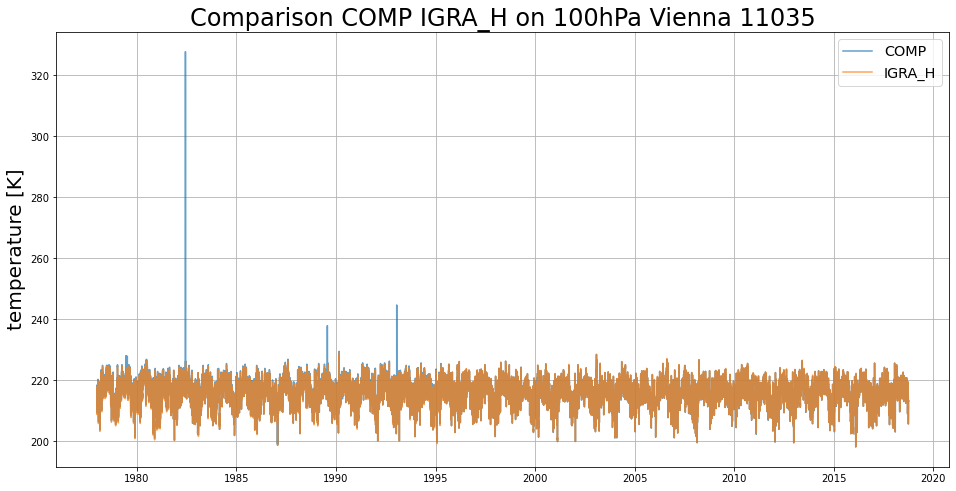

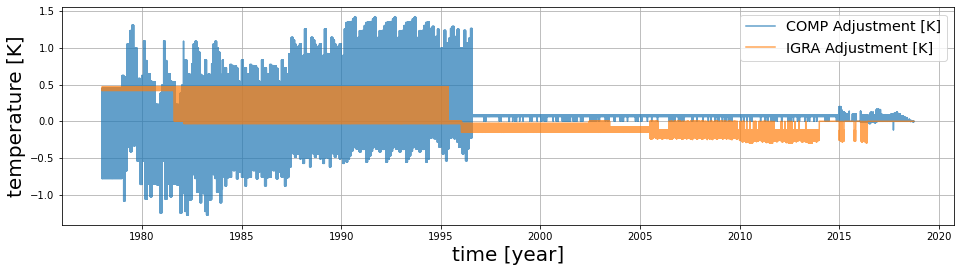

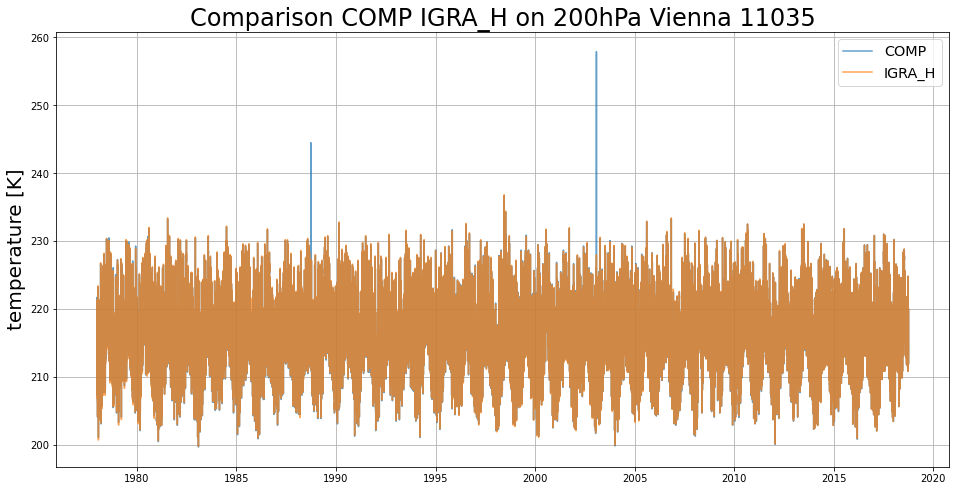

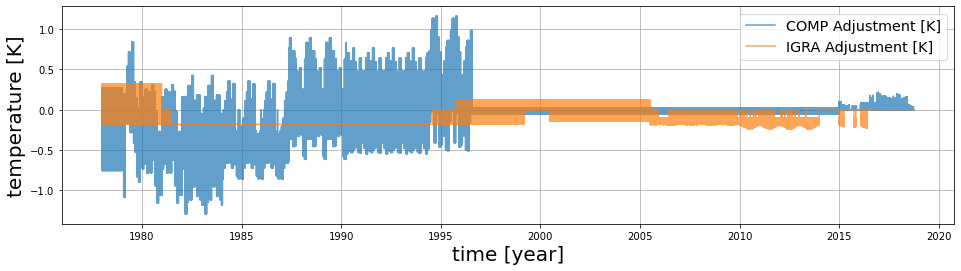

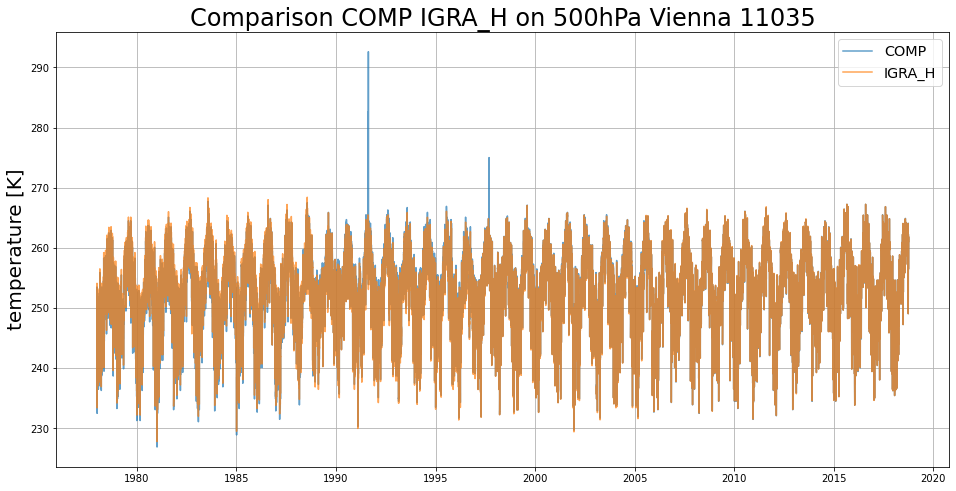

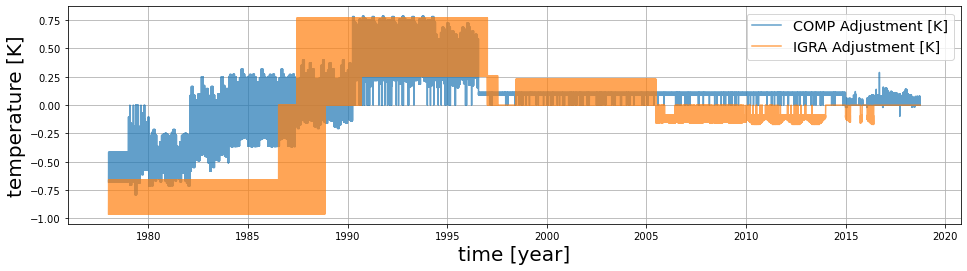

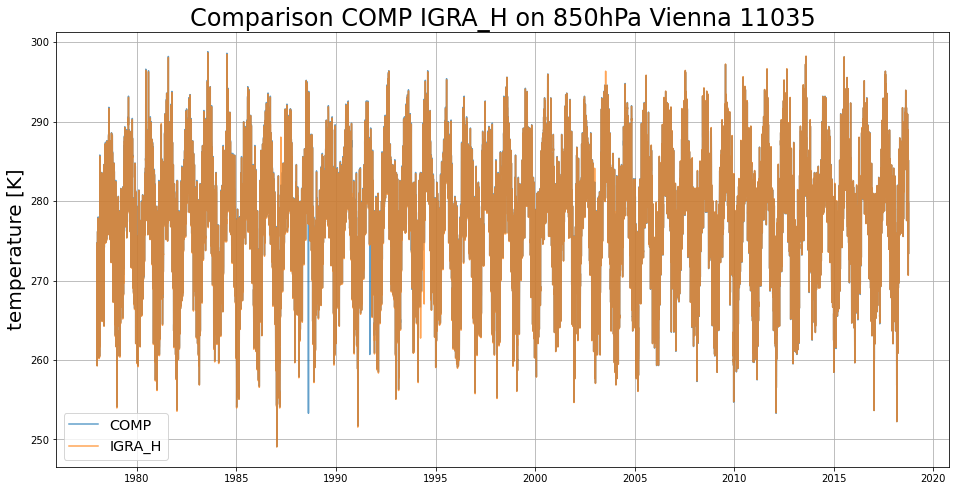

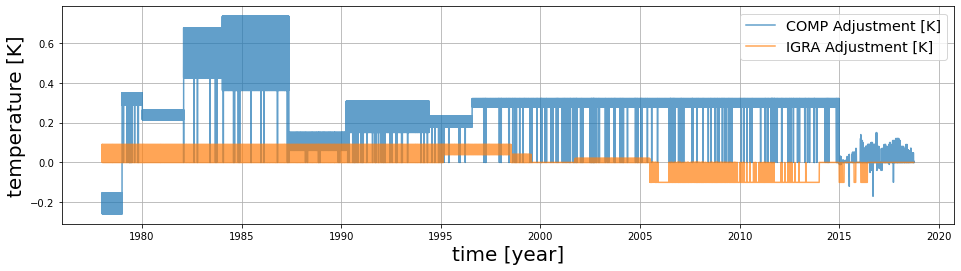

In [10]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
 

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


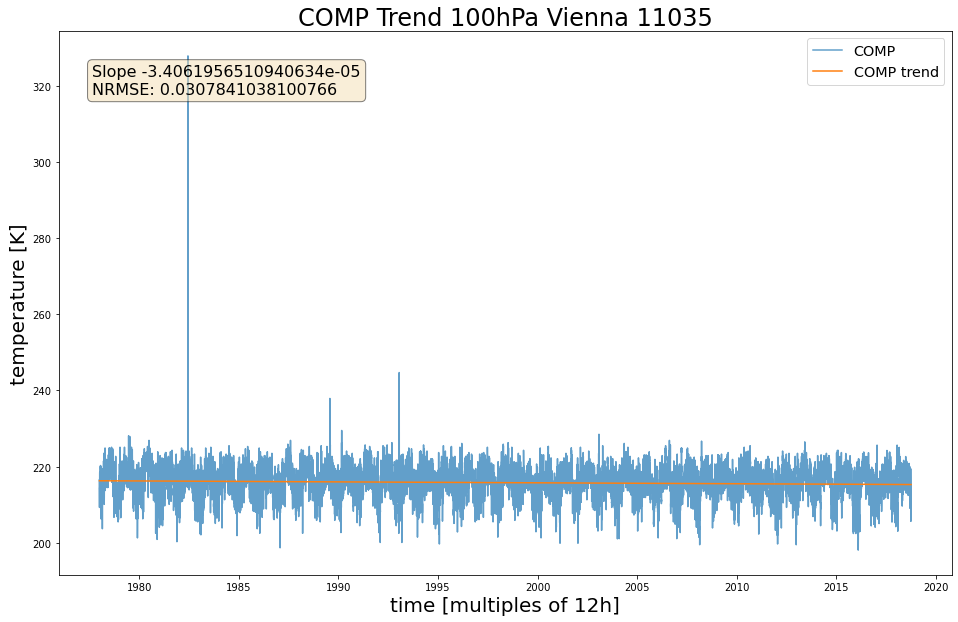

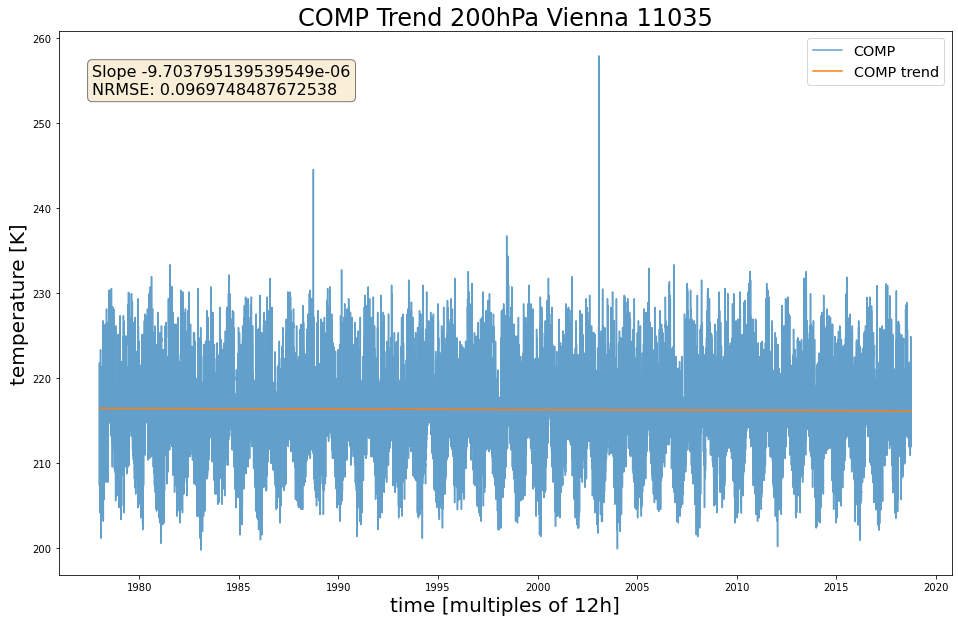

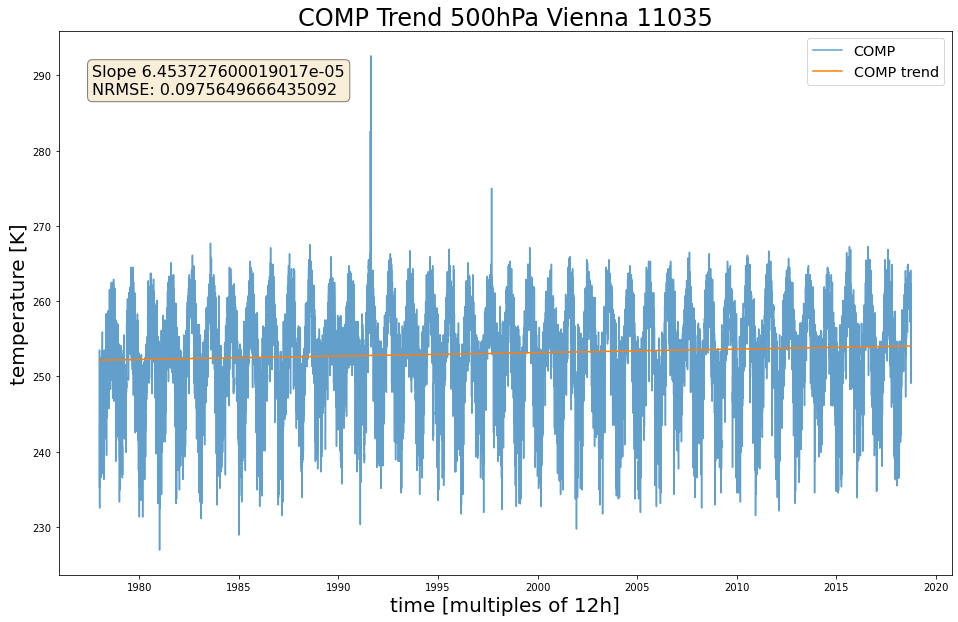

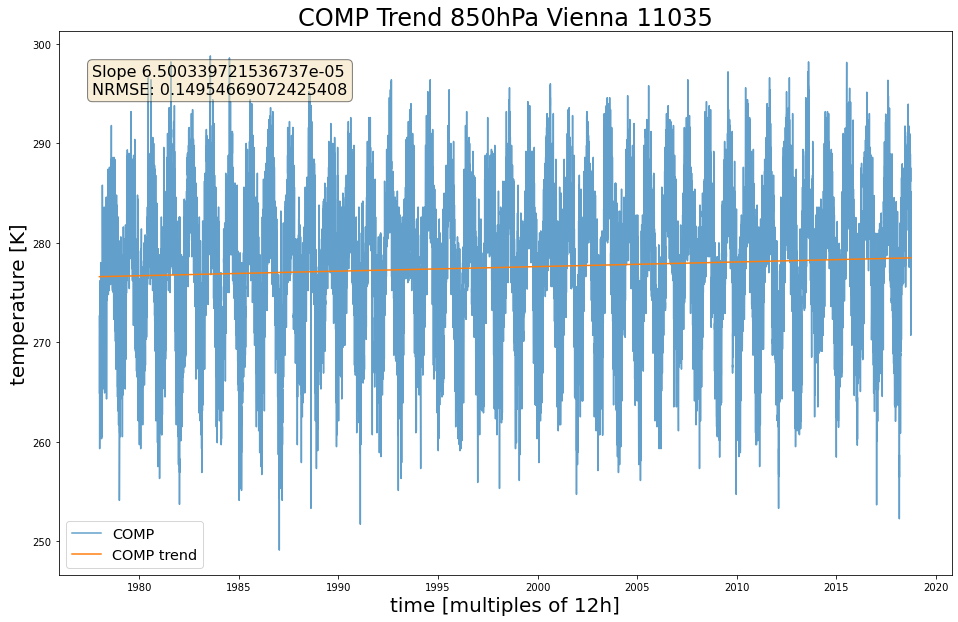

In [11]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)
    

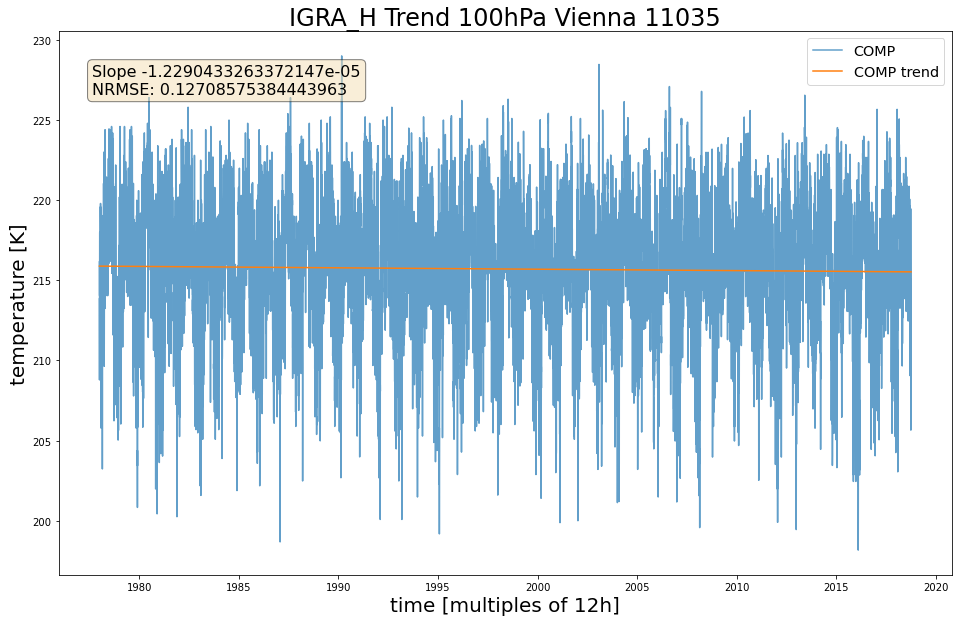

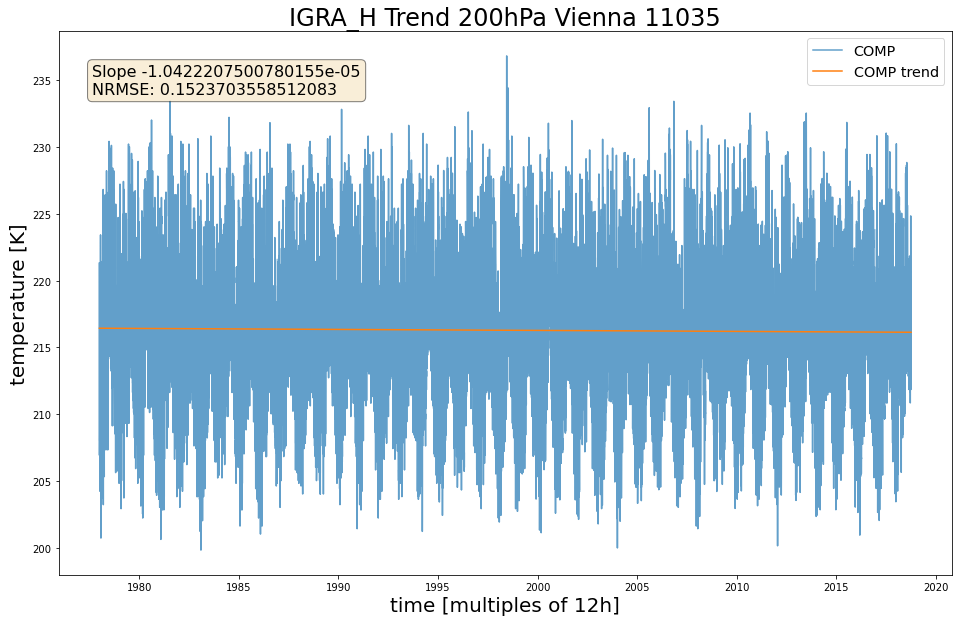

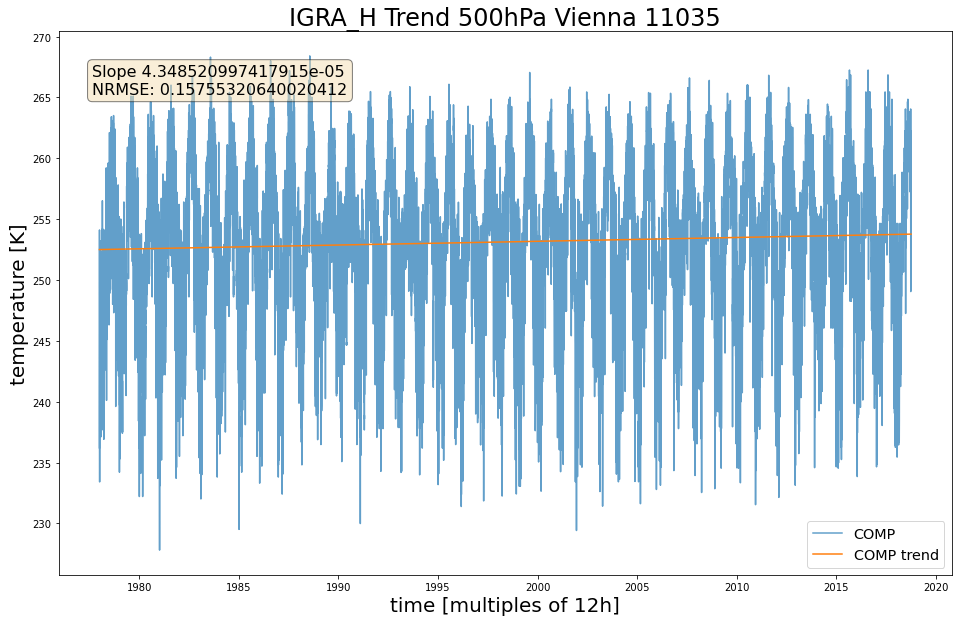

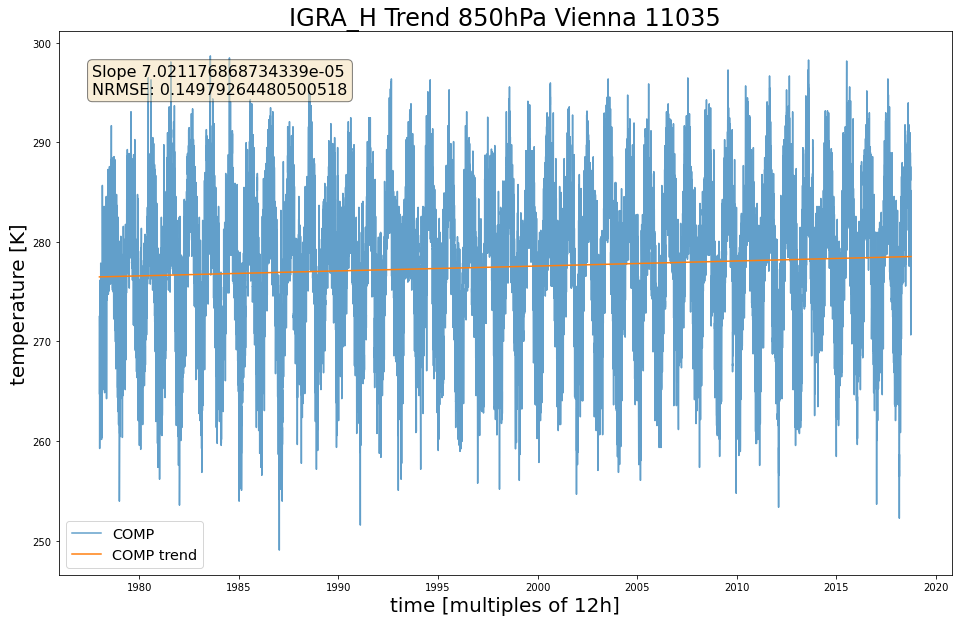

In [12]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    b = igra_h_adjusted[i]
    xax = np.asarray(b.report_timestamp)
    
    selected = b.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [13]:
comp_ma = []
igra_h_ma = []
igra_ma = []
for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

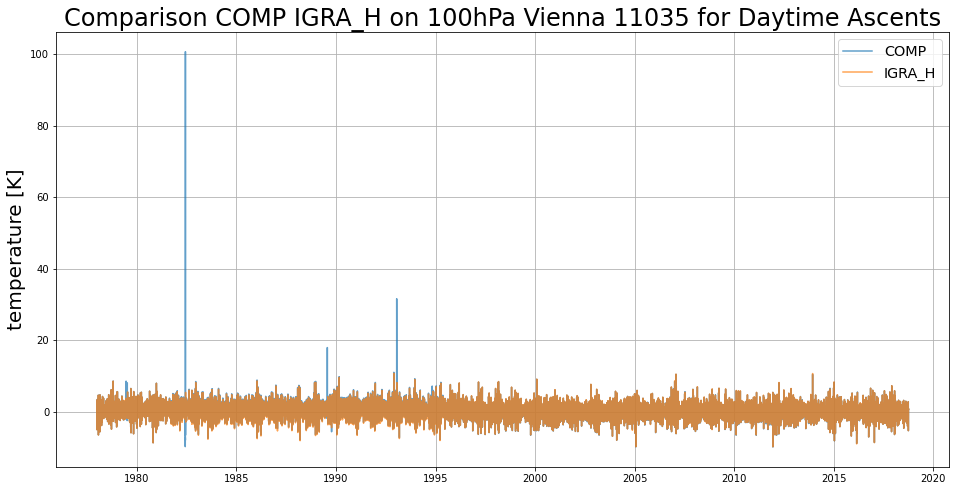

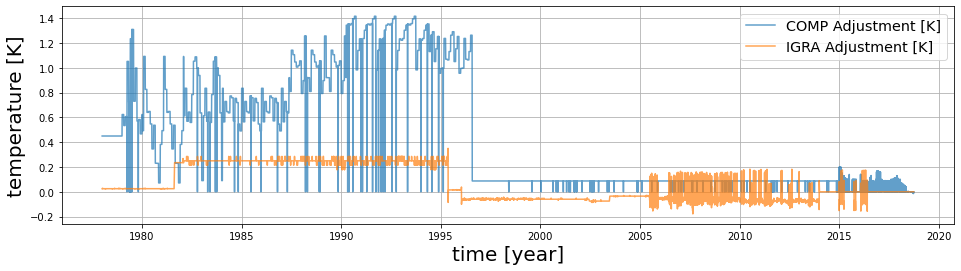

COMP Adjustment MEAN: 0.441214642358418
COMP Adjustment MIN: -0.01375
COMP Adjustment MAX: 1.4166778
IGRA Adjustment MEAN: 0.05875573821948443
IGRA Adjustment MIN: -0.1785714285714448
IGRA Adjustment MAX: 0.35071428571430374


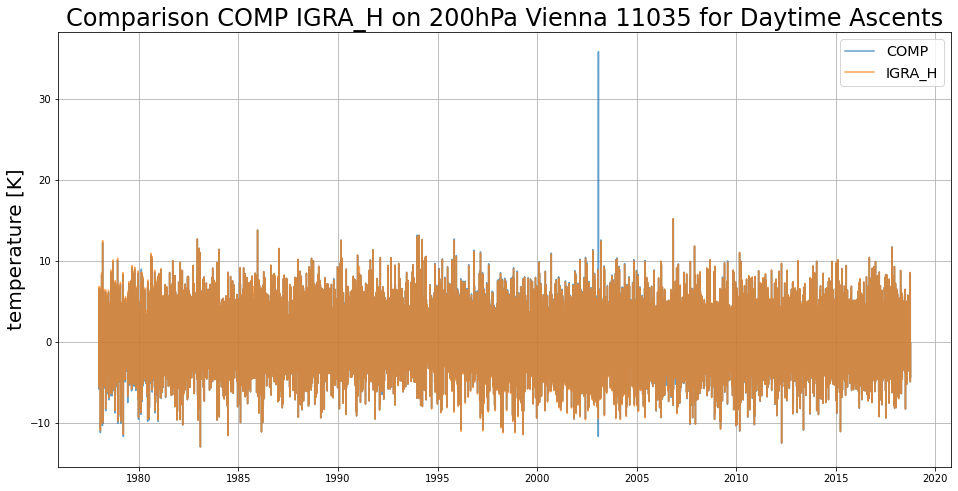

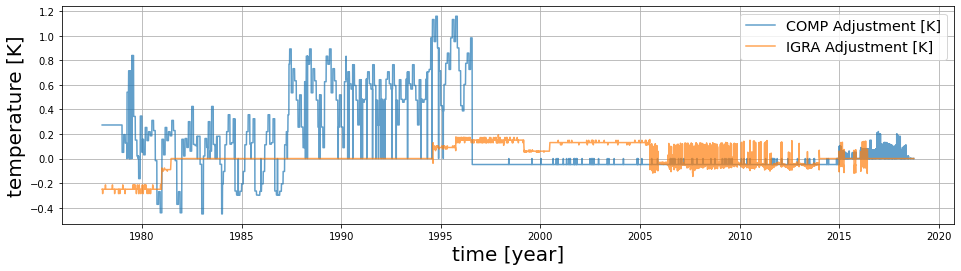

COMP Adjustment MEAN: 0.13447629844744244
COMP Adjustment MIN: -0.450769
COMP Adjustment MAX: 1.1582059
IGRA Adjustment MEAN: 0.003492840401016166
IGRA Adjustment MIN: -0.28571428571433444
IGRA Adjustment MAX: 0.19285714285715017


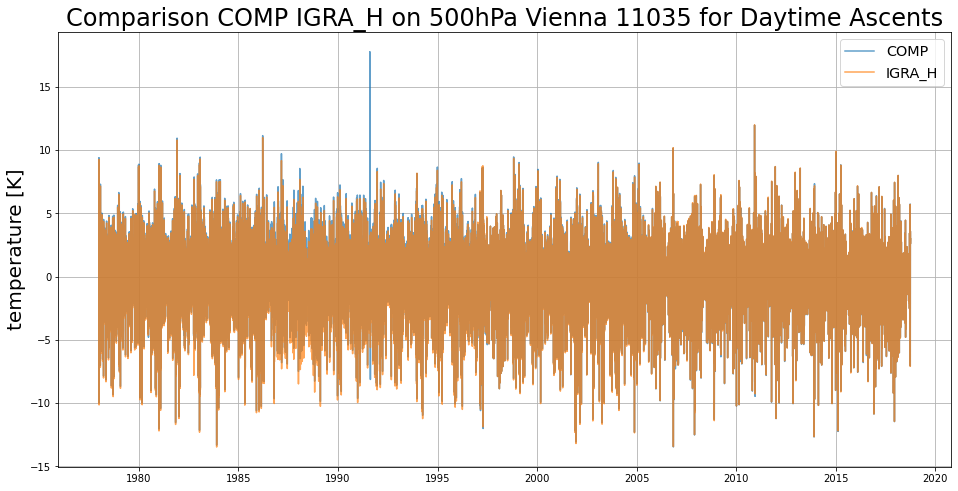

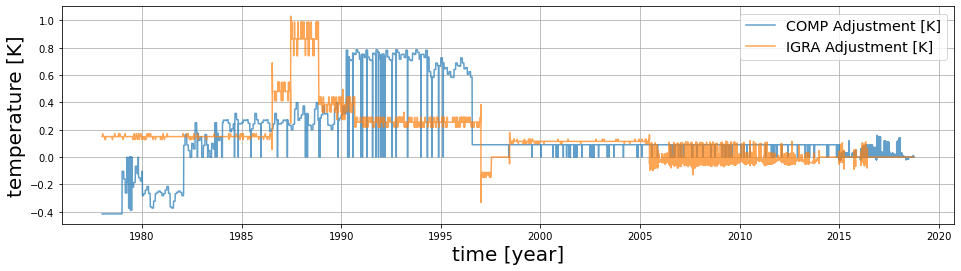

COMP Adjustment MEAN: 0.16407816655015703
COMP Adjustment MIN: -0.4154892
COMP Adjustment MAX: 0.7844114000000001
IGRA Adjustment MEAN: 0.13905570171993978
IGRA Adjustment MIN: -0.3314285714285745
IGRA Adjustment MAX: 1.030000000000058


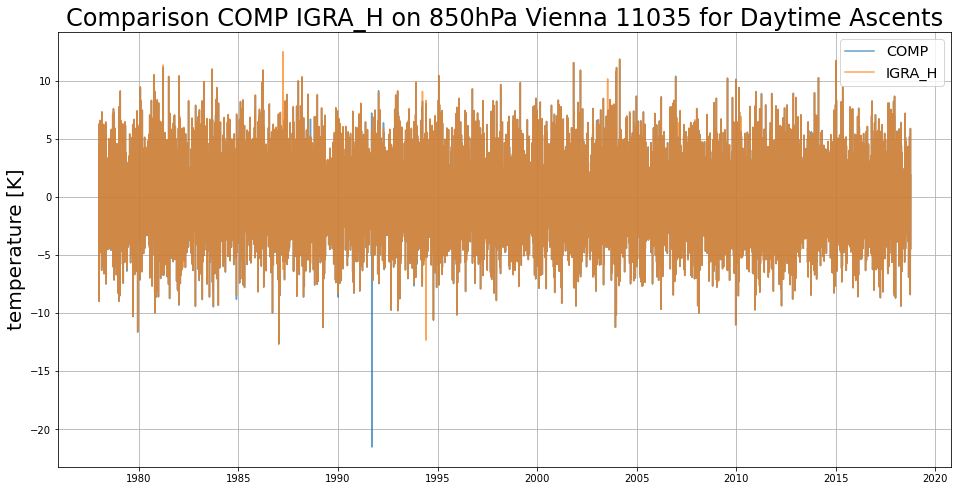

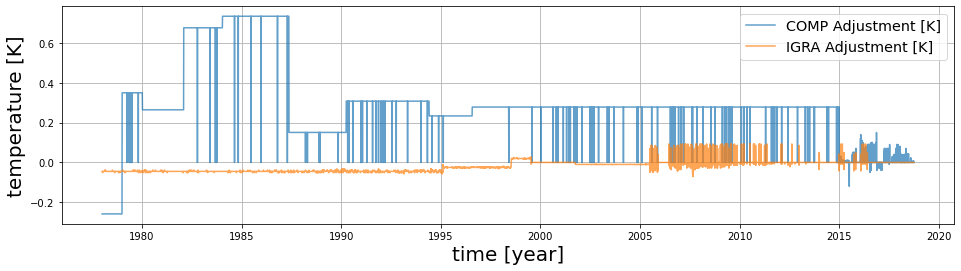

COMP Adjustment MEAN: 0.28632035471366624
COMP Adjustment MIN: -0.2586051
COMP Adjustment MAX: 0.7344350000000001
IGRA Adjustment MEAN: -0.021154628437797657
IGRA Adjustment MIN: -0.07142857142866887
IGRA Adjustment MAX: 0.0928571428572127


In [14]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))


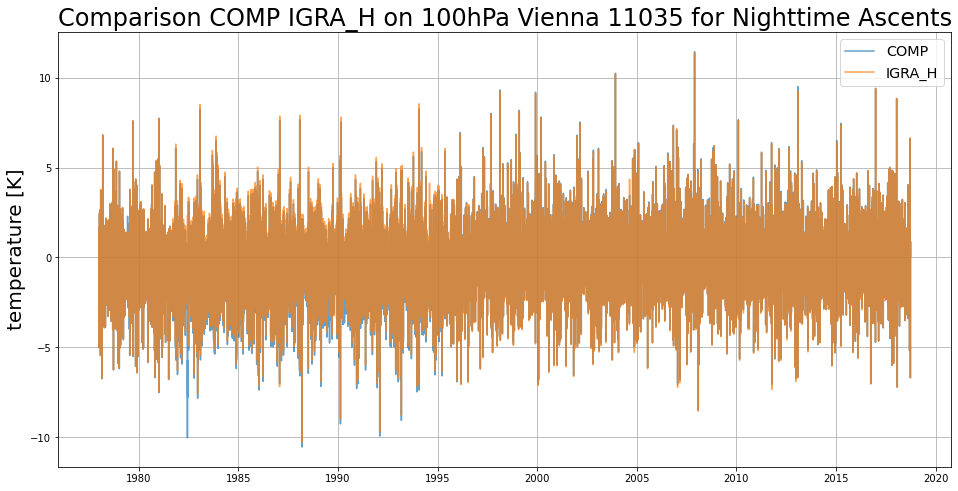

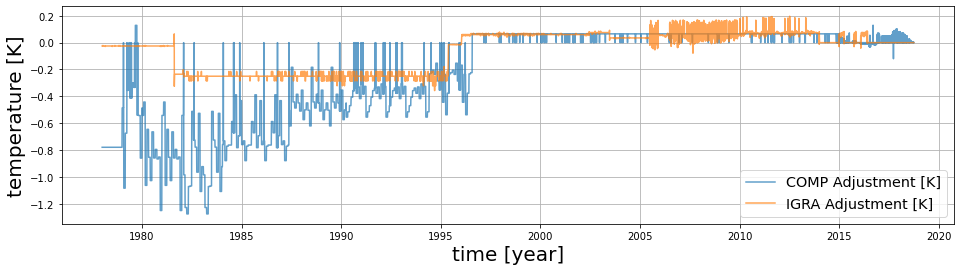

COMP Adjustment MEAN: -0.23117458043052588
COMP Adjustment MIN: -1.2750107
COMP Adjustment MAX: 0.13
IGRA Adjustment MEAN: -0.05899466341088765
IGRA Adjustment MIN: -0.3571428571428612
IGRA Adjustment MAX: 0.1964285714285552


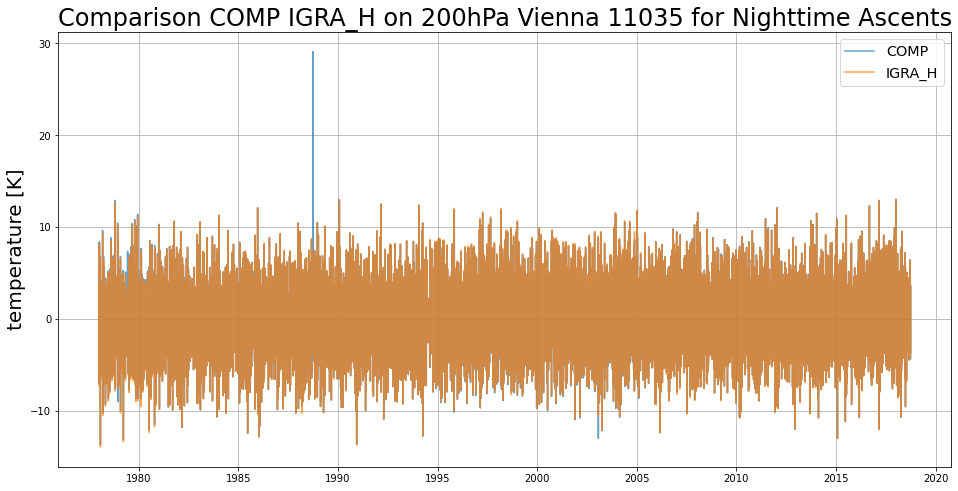

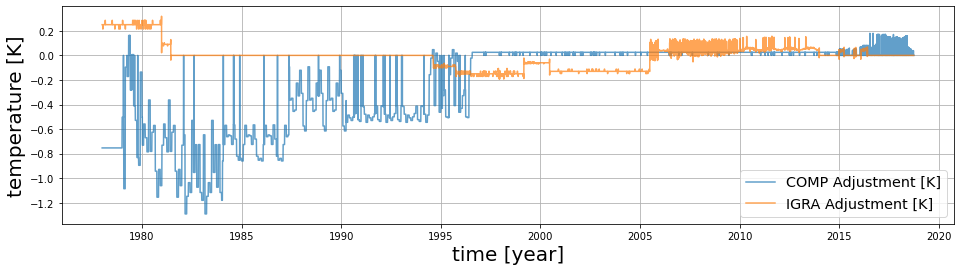

COMP Adjustment MEAN: -0.2440470273396998
COMP Adjustment MIN: -1.2905188
COMP Adjustment MAX: 0.18
IGRA Adjustment MEAN: -0.003482314986032835
IGRA Adjustment MIN: -0.19285714285715017
IGRA Adjustment MAX: 0.31857142857140275


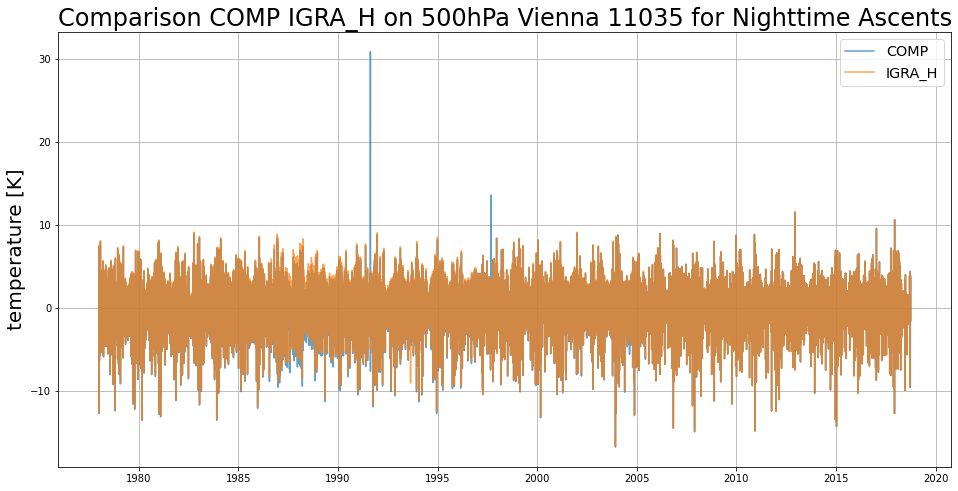

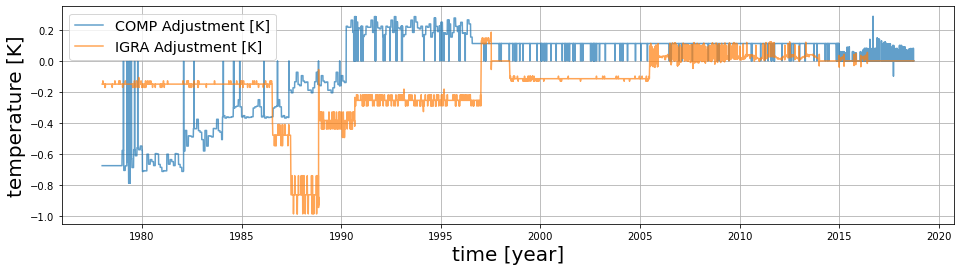

COMP Adjustment MEAN: -0.042133342371944535
COMP Adjustment MIN: -0.7902123000000001
COMP Adjustment MAX: 0.2884607
IGRA Adjustment MEAN: -0.13891846823870949
IGRA Adjustment MIN: -0.9885714285715039
IGRA Adjustment MAX: 0.18571428571425486


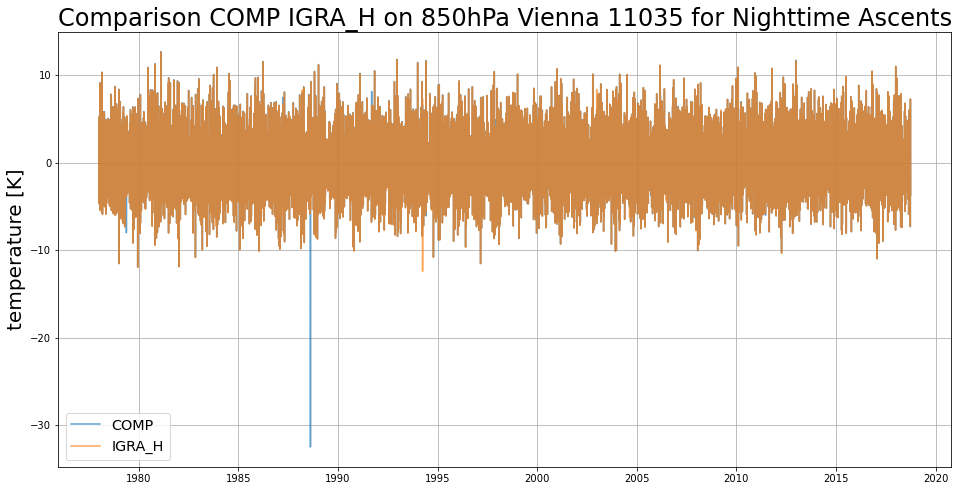

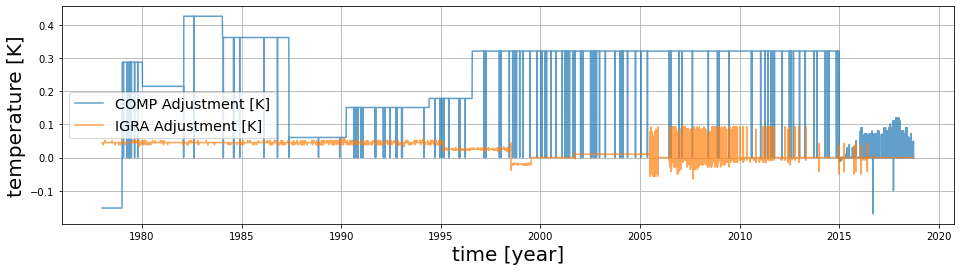

COMP Adjustment MEAN: 0.23713555962251814
COMP Adjustment MIN: -0.17
COMP Adjustment MAX: 0.42595340000000004
IGRA Adjustment MEAN: 0.021150264259189384
IGRA Adjustment MIN: -0.06428571428574514
IGRA Adjustment MAX: 0.0928571428572127


In [15]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))

## Difference:

Finding the difference between the two data sets by subtracting them.

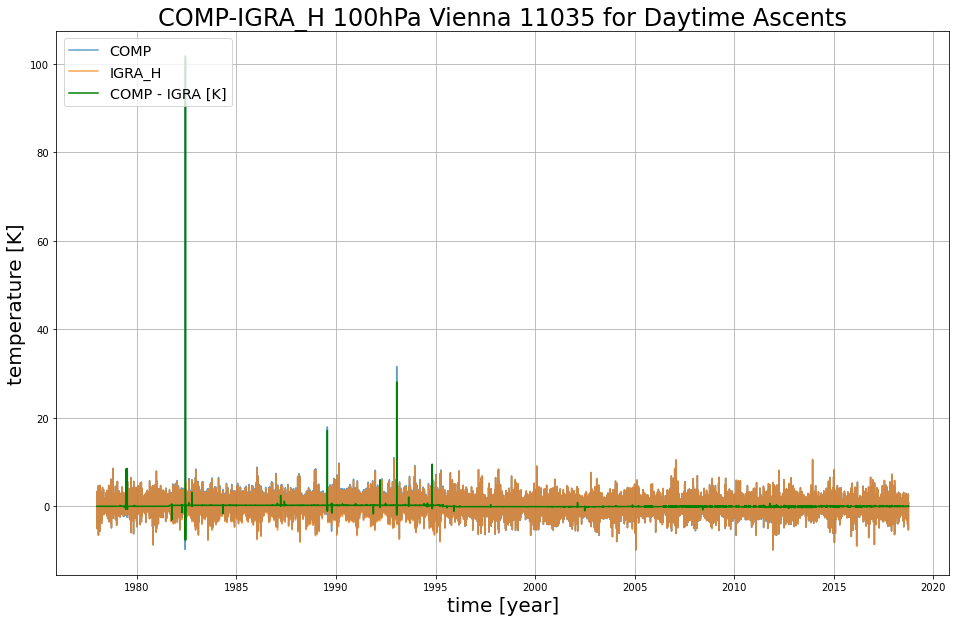

DIFF MEAN: 0.06615068466276933
DIFF MIN: -7.557142857142878
DIFF MAX: 101.74285714285716


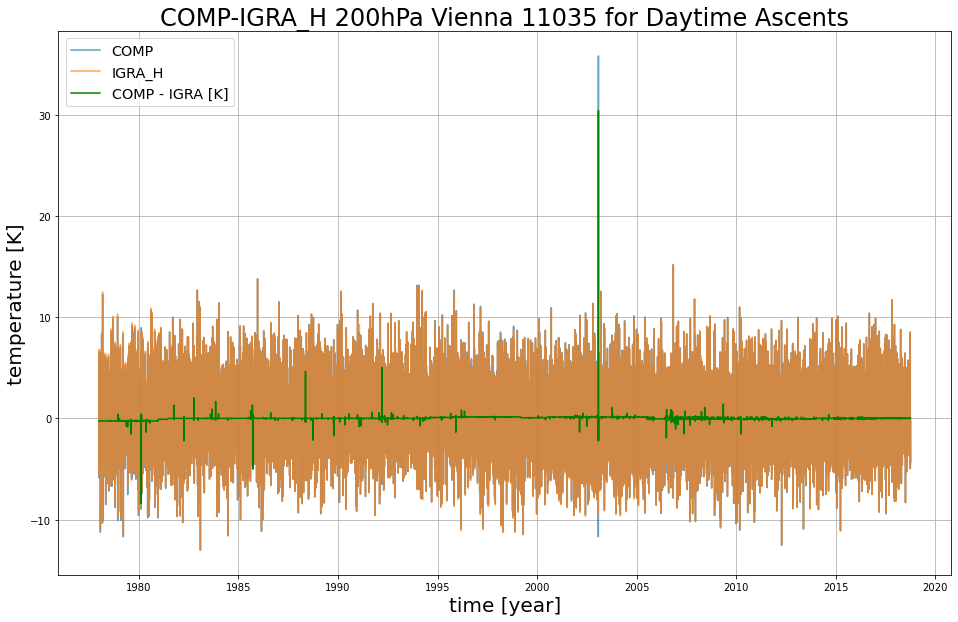

DIFF MEAN: 0.003965058793405557
DIFF MIN: -8.421428571428578
DIFF MAX: 30.401428571428568


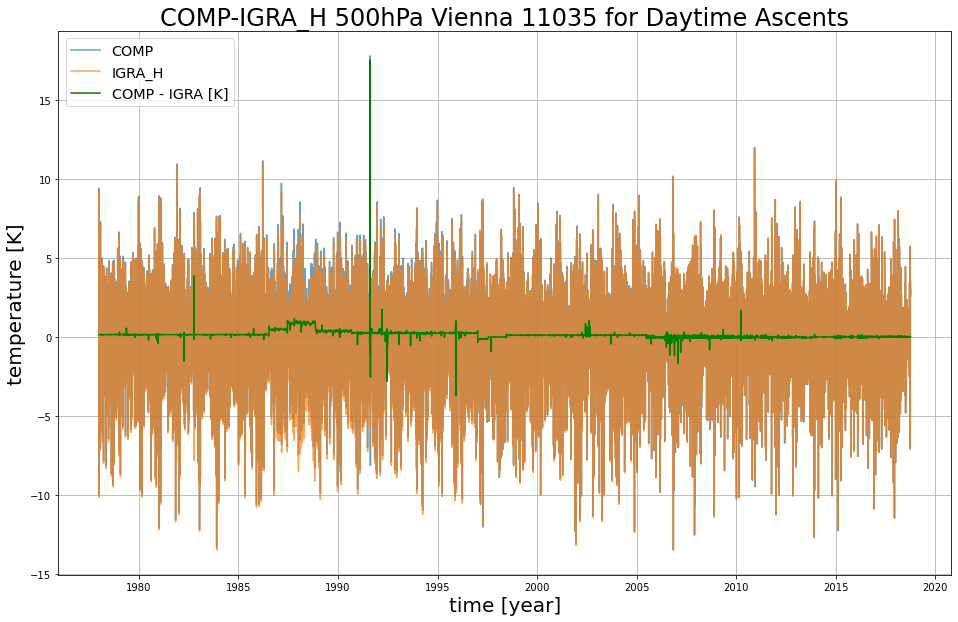

DIFF MEAN: 0.13582615055367975
DIFF MIN: -3.7207142857142514
DIFF MAX: 17.52642857142854


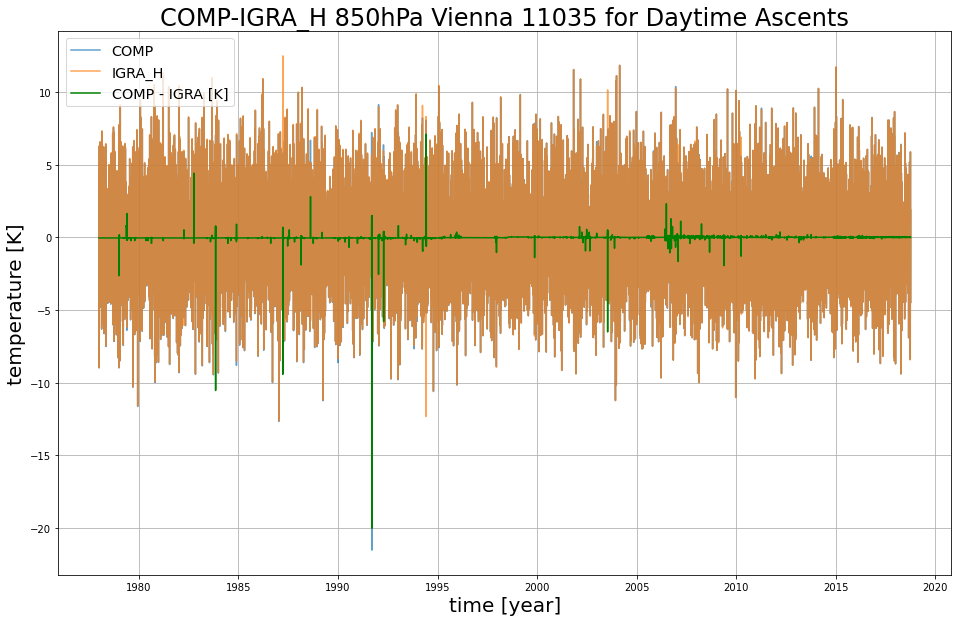

DIFF MEAN: -0.02193602428934942
DIFF MIN: -20.00928571428568
DIFF MAX: 7.098571428571461


In [16]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

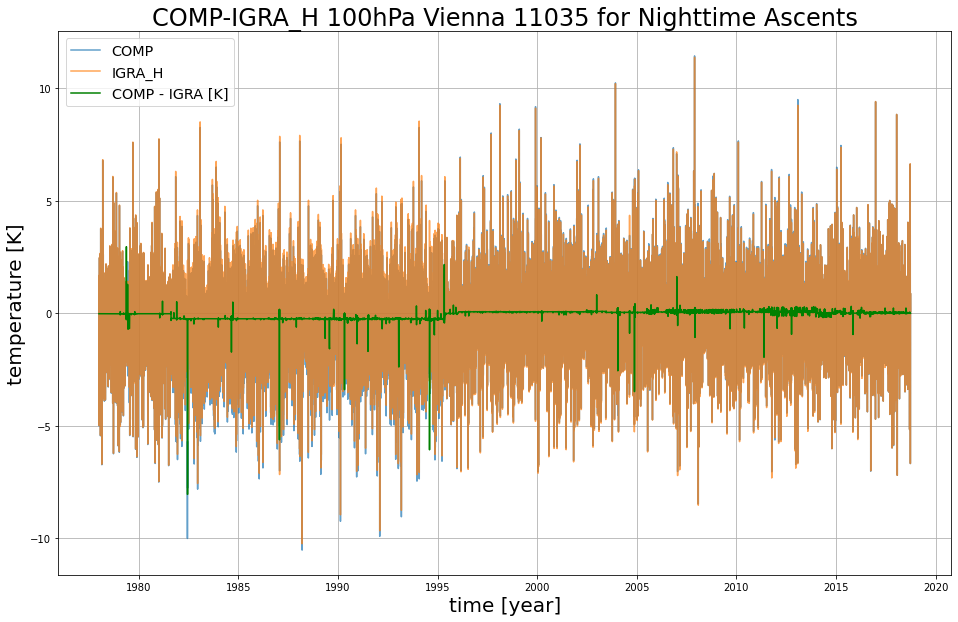

DIFF MEAN: -0.0664201037779508
DIFF MIN: -8.057142857142907
DIFF MAX: 2.957142857142884


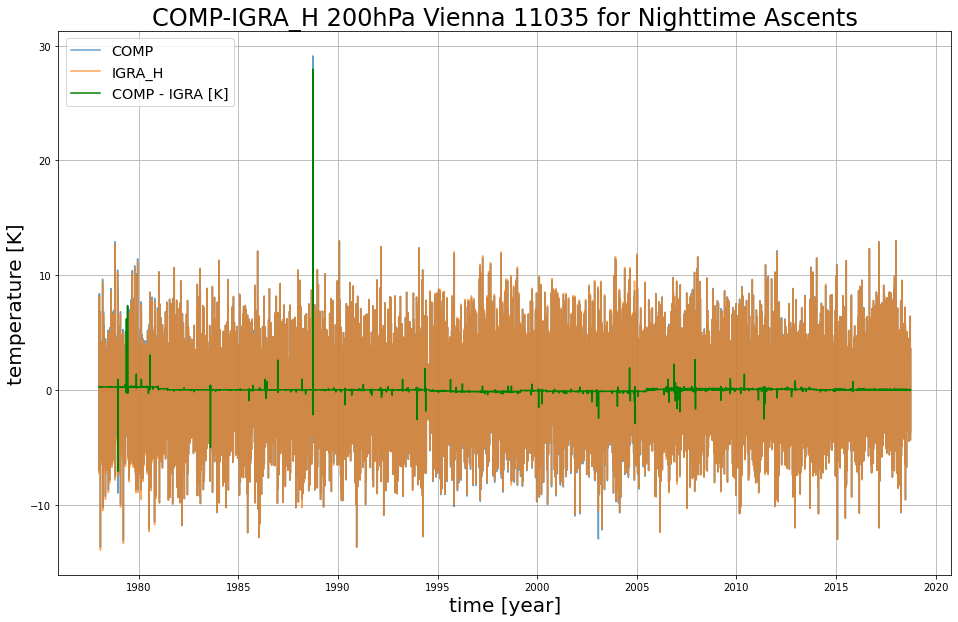

DIFF MEAN: -0.0039564071290864415
DIFF MIN: -7.092857142857156
DIFF MAX: 27.94999999999999


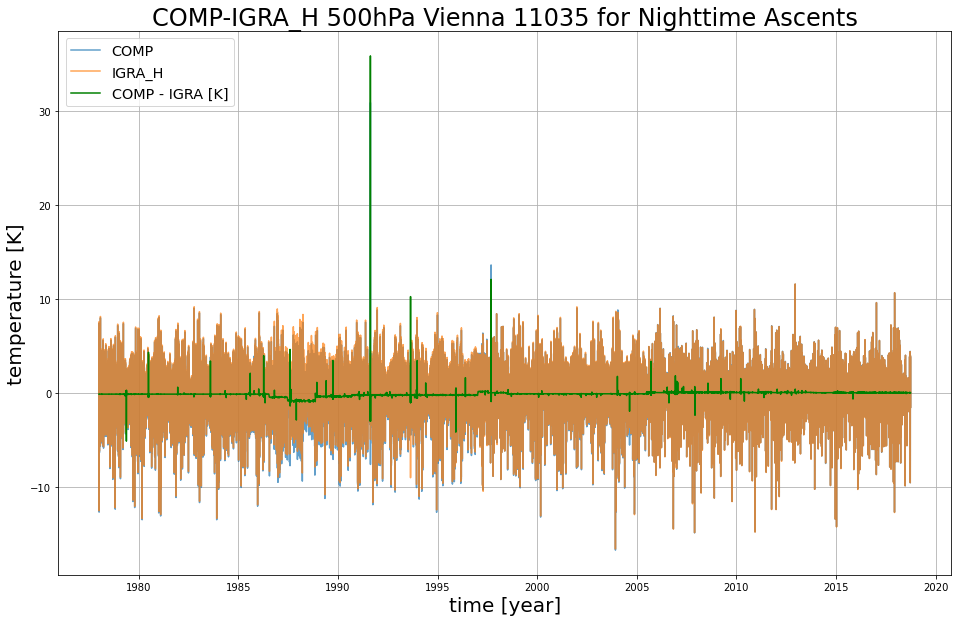

DIFF MEAN: -0.1356940302899507
DIFF MIN: -5.153571428571411
DIFF MAX: 35.86642857142857


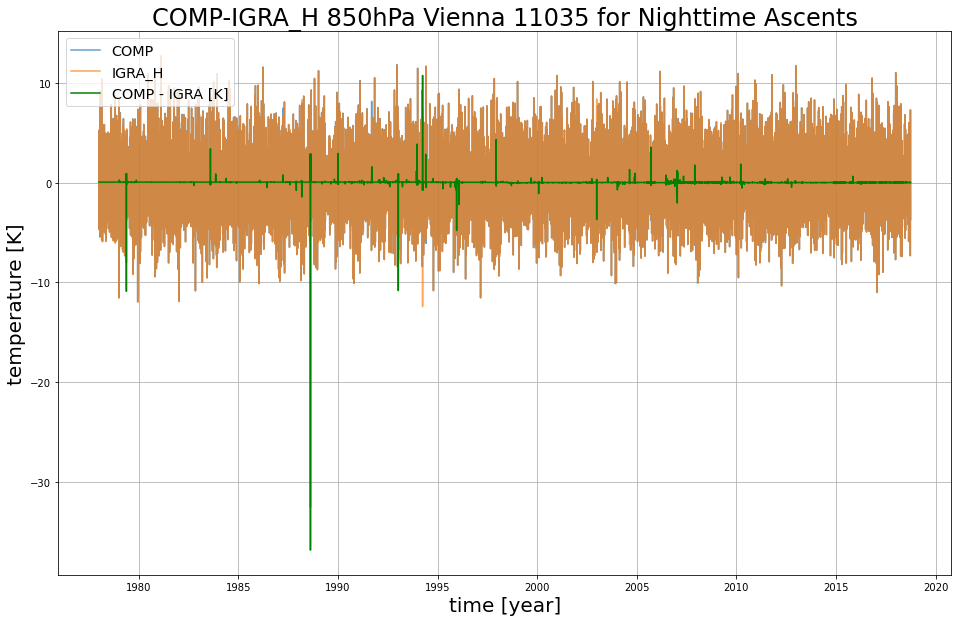

DIFF MEAN: 0.02192904296913395
DIFF MIN: -36.812857142857126
DIFF MAX: 10.73071428571427


In [17]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments:

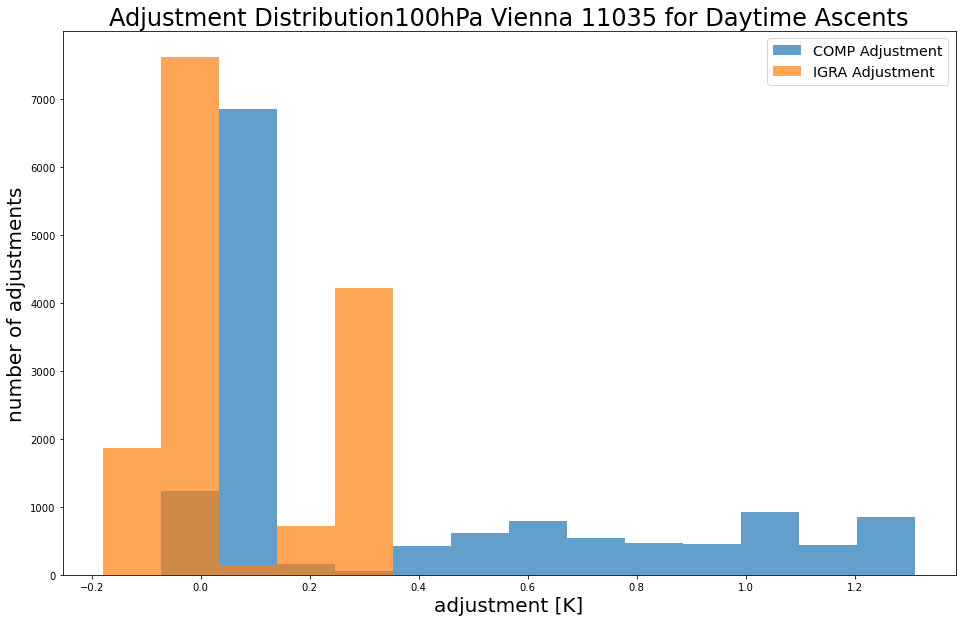

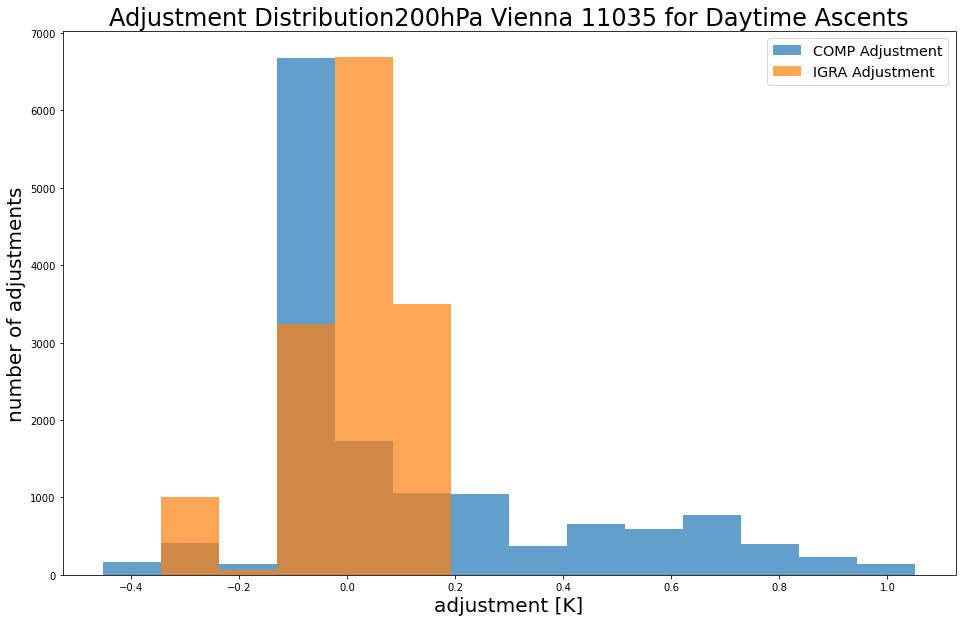

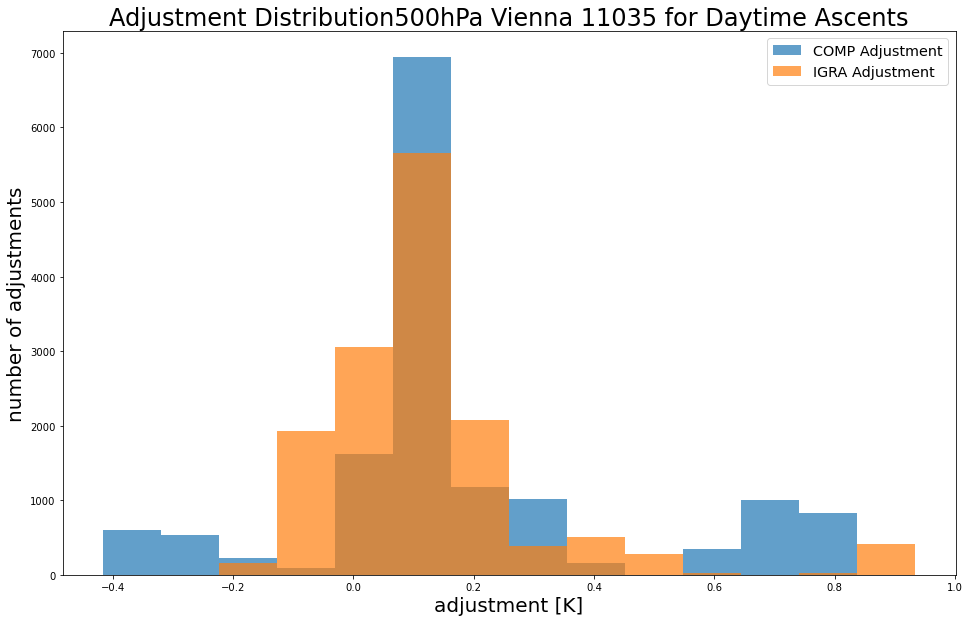

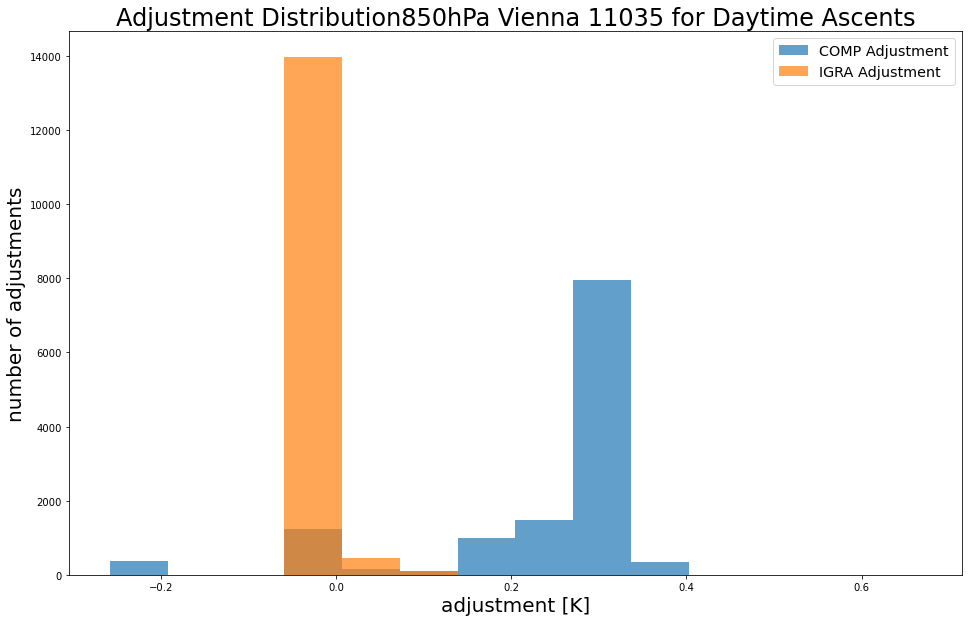

In [18]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

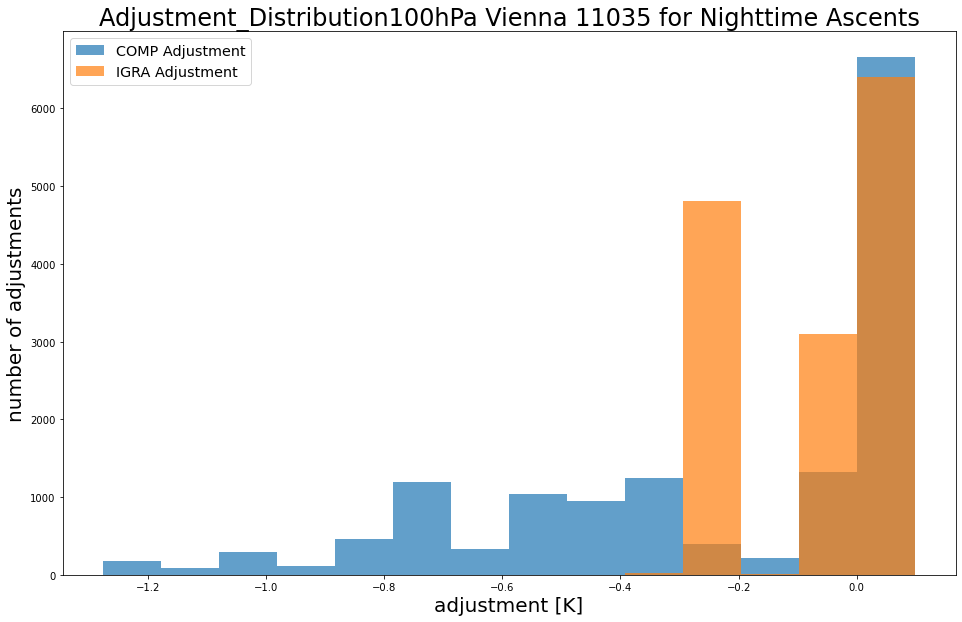

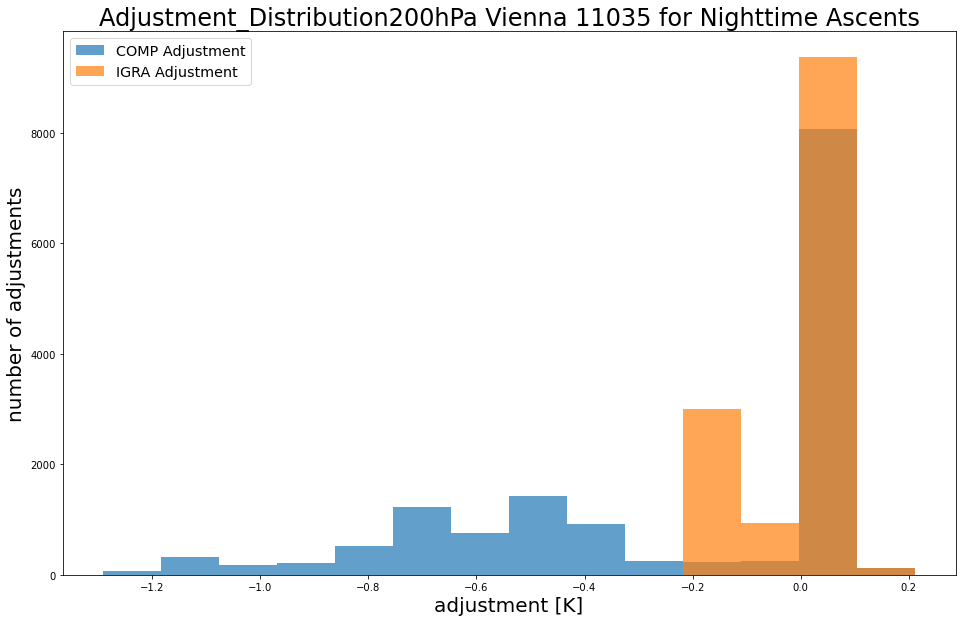

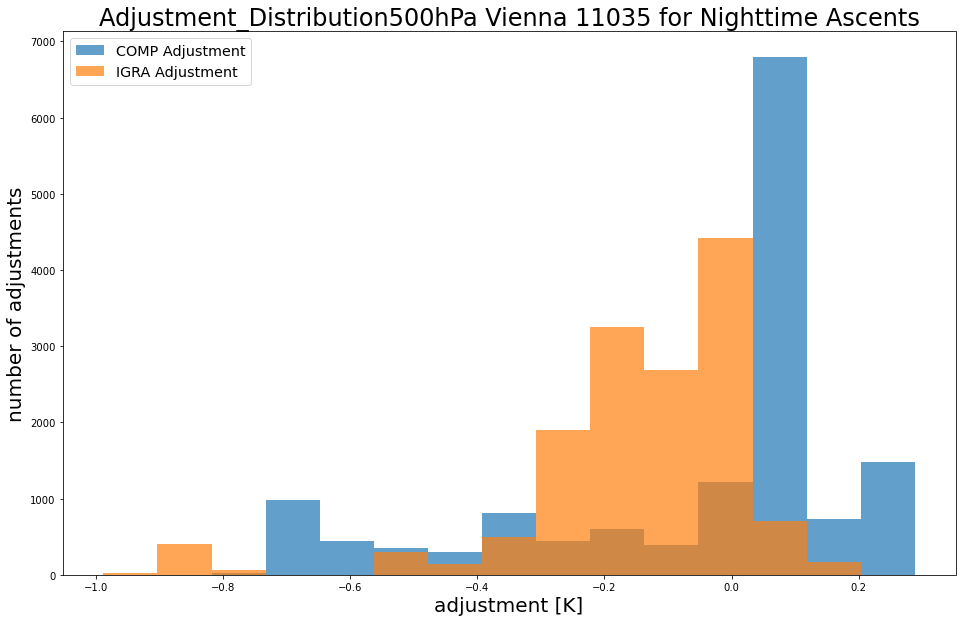

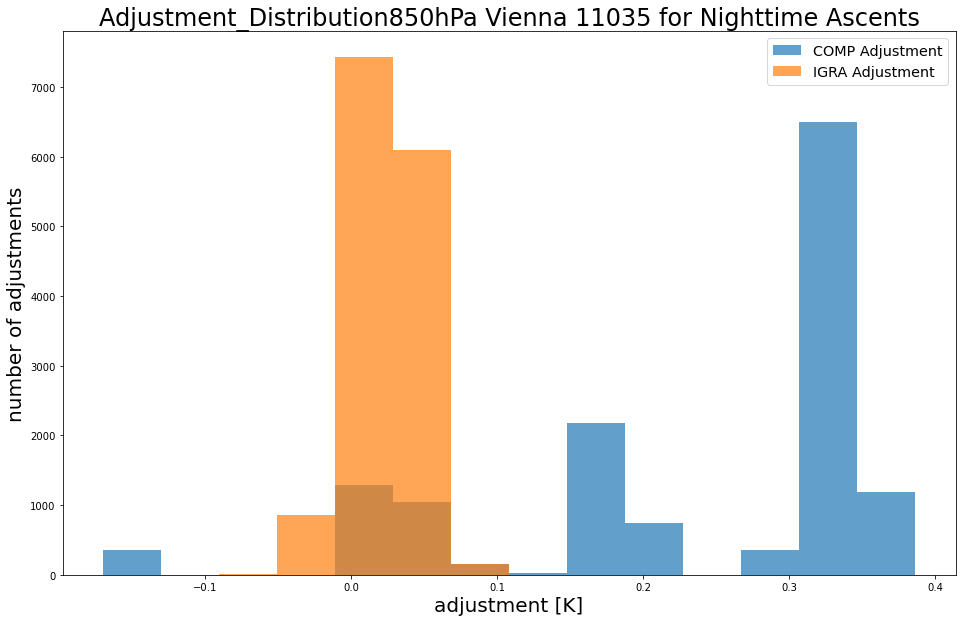

In [19]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)